In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:

#random sample of 5 as list without replacement (nos will not be repeated insample)
randomsample=random.sample(range(1,6),5) 
print(randomsample,type(randomsample))

#random sample of 5 as array with replacement (nos can be repeated insample)
list1 = list(range(1,6))
randomsample2 = np.random.choice(list1,5)
print(randomsample2,type(randomsample2))

[4, 5, 1, 3, 2] <class 'list'>
[3 4 1 4 3] <class 'numpy.ndarray'>


In [3]:
# read csv file
carbon = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Carbon.dat',sep='\s+')
print(type(carbon)) #DataFrame type
print(carbon.shape) 
print(carbon.loc[[20]])  # data at index 20
print(carbon.columns) # column names
print(carbon.head())    #first 5 values in data frame
print(carbon.tail())

<class 'pandas.core.frame.DataFrame'>
(31, 2)
         Nation  CO2
20  Netherlands  9.9
Index(['Nation', 'CO2'], dtype='object')
     Nation  CO2
0   Albania  2.0
1   Austria  6.9
2   Belgium  8.3
3    Bosnia  6.2
4  Bulgaria  5.9
         Nation  CO2
26     Slovenia  6.2
27        Spain  5.0
28       Sweden  4.5
29  Switzerland  4.3
30           UK  6.5


In [4]:
# count, mean, std, min, lower quartile (25th percentile),  median (50th percentile), upper quartile (75th percentile),  max
print(carbon.describe())

#mean
print('mean',carbon['CO2'].mean())

#std
print('std',carbon['CO2'].std())

#median
print('median',carbon['CO2'].median())

             CO2
count  31.000000
mean    5.819355
std     1.964929
min     2.000000
25%     4.350000
50%     5.400000
75%     6.700000
max     9.900000
mean 5.819354838709677
std 1.9649290665464594
median 5.4


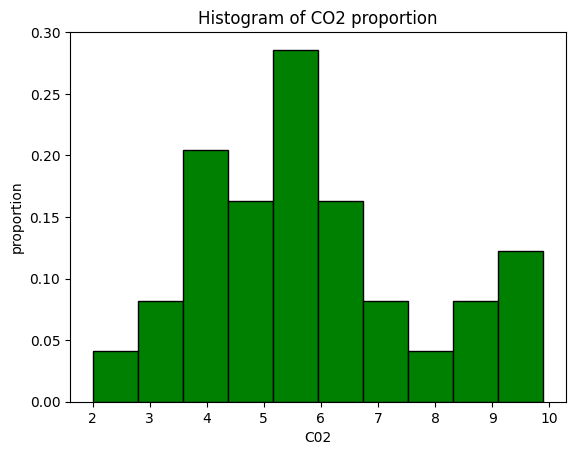

In [5]:
#plot histogram
#bins=total no. of bars. density=True shows proportion such that integral of the plot is 1.
#density=False uses counts for y-axis
plt.hist(carbon['CO2'],density=True, bins=10,color="green",edgecolor="black") 
plt.ylabel('proportion')
plt.xlabel('C02')
plt.title("Histogram of CO2 proportion")
plt.show()

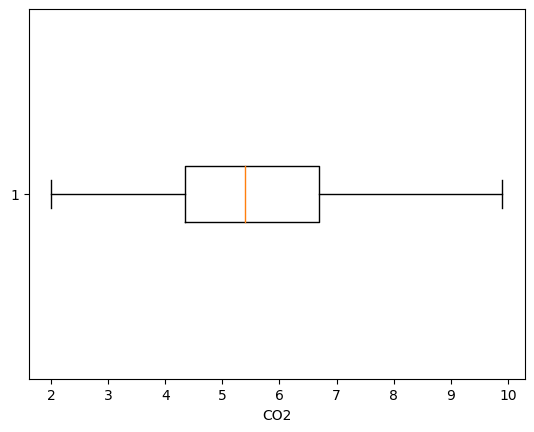

In [6]:
#subplot is used to create multiple plots in a single image. Return figure and axes of each plot
fig1,ax1 = plt.subplots()
plt.xlabel("CO2")
plt.boxplot(carbon["CO2"],vert=False) #boxplot
plt.show()

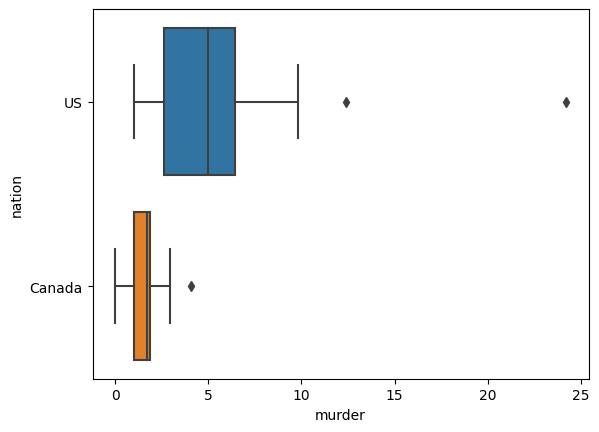

In [7]:
#side by side boxplot
crime = pd.read_csv("http://stat4ds.rwth-aachen.de/data/Murder2.dat",sep="\s+")
sns.boxplot(x="murder",y="nation", data=crime,orient='h')
plt.show()                  #as sns is based on matplotlib

In [8]:
gs = pd.read_csv("http://stat4ds.rwth-aachen.de/data/Guns_Suicide.dat",sep="\s+")
#no of non missing values
print(gs.info()) 

#correlation matrix
print(gs.corr()) 

#scatter plot
gs.plot(kind="scatter",x="guns",y="suicide",color="green",figsize=(8,6))
plt.xlabel("Guns")
plt.ylabel("Suicide")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   state    51 non-null     object 
 1   guns     51 non-null     float64
 2   suicide  51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB
None


ValueError: could not convert string to float: 'AK'

[19.12009453 18.46197492 18.67489597 14.3971185  11.16458982 14.06805869
 10.52582666  8.39661616 12.55825488 12.42275966 15.32622853  9.26765682
 18.38454908 11.20330274 14.93909935 15.90692231 15.84885293 16.68118068
 16.21662566 11.16458982  9.86770705 15.34558499 15.19073332 16.04241752
 16.17791274 17.9006376  19.2749462  15.53914959 15.28751562 17.9006376
 13.29380032  9.57736017 15.05523811 13.48736492 10.89359939 13.60350367
 16.02306106 15.09395102 14.45518787  9.96448935 16.1004869  18.98459931
 16.37147733 14.33904912 16.15855628 14.33904912 16.1972692  14.3971185
 15.96499169 18.59747013 19.54593663]


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

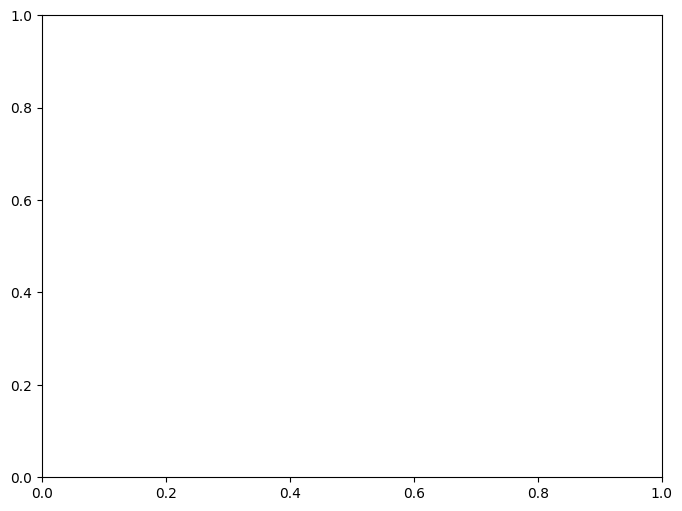

In [9]:
# gives 5 equally spaced numbers including the endpoints, spaces are 4. (end-start)/(no - 1) interval lenght 
x=np.linspace(0,20,5)

#returns coefficient and constants of polynomial. below eg. returns m and c from y=mx+c.
coef= np.polyfit(gs["guns"],gs["suicide"],1)

#turn list into polynomial. if list is of n no.s then polynomial of deg n-1 will generate 
yn= np.poly1d(coef)

#set figure size
fig =plt.figure(figsize=(8,6))

#returns output of the polynomial at individual values of coef
print(yn(gs["guns"]))

#2 plots on same graph. first is scatter plot of guns and suicide. second is line graph of guns and output of polynomial yn
plt.plot(gs["guns"],gs["suicide"],'o',gs["guns"],yn(gs["guns"]))

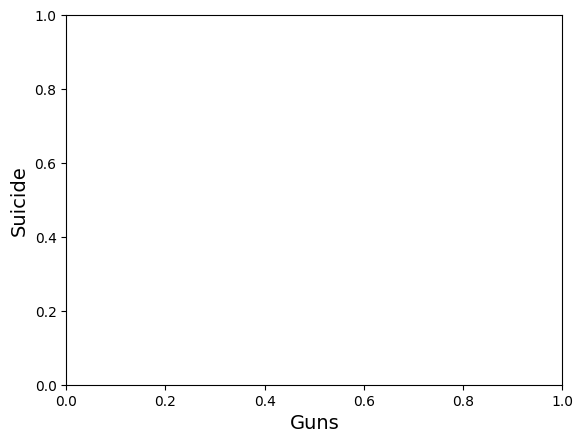

Intercept    7.390080
guns         0.193565
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                suicide   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     58.84
Date:                Sat, 01 Jul 2023   Prob (F-statistic):           6.11e-10
Time:                        18:02:15   Log-Likelihood:                -121.12
No. Observations:                  51   AIC:                             246.2
Df Residuals:                      49   BIC:                             250.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [11]:
plt.xlabel("Guns",size=14)
plt.ylabel("Suicide",size=14)
plt.show()

#fit a linear model to data. Ordinary Least Squares(OLS) function
mod = smf.ols(formula='suicide ~ guns',data=gs).fit()

#returns intercept and slope
print(mod.params)

#returns summary of model https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a
print(mod.summary())